In [40]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from flame_pytorch.flame import FLAME
from flame_pytorch.config import get_config

In [41]:
# ---- Step 1: Load landmark embedding (from RingNet) ----
embedding = np.load("./model/flame_dynamic_embedding.npy", allow_pickle=True, encoding="latin1").item()
lmk_face_idx = torch.tensor(np.array(embedding['lmk_face_idx']), dtype=torch.long)
lmk_b_coords = torch.tensor(np.array(embedding['lmk_b_coords']), dtype=torch.float32)

In [42]:
num_verts = 5023
num_faces = 9976

config = get_config()
flame_model = FLAME(config)


creating the FLAME Decoder


UnpicklingError: invalid load key, '{'.

In [43]:
import os
config = get_config()
print(f"FLAME model path: {config.flame_model_path}")
print(f"File exists: {os.path.exists(config.flame_model_path)}")

# Check the first few bytes of the file
with open(config.flame_model_path, "rb") as f:
    first_bytes = f.read(20)
    print(f"First 20 bytes: {first_bytes}")

FLAME model path: c:\Users\user\AppData\Roaming\jupyter\runtime\kernel-v3eb37cab691f307ee0034a379e0a2801b301fee9a.json
File exists: True
First 20 bytes: b'{"key":"90cf004a-6f4'


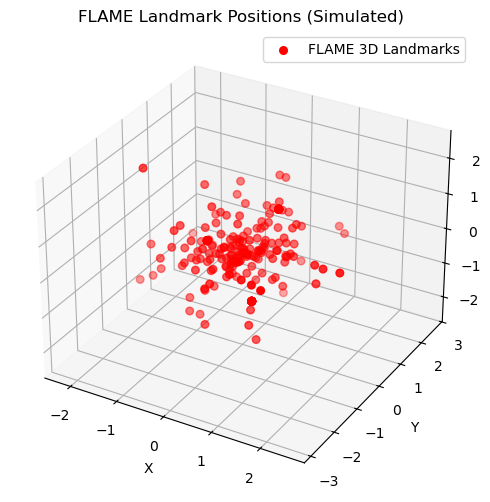

In [44]:
def get_3d_landmarks(mesh_verts, mesh_faces, lmk_face_idx, lmk_b_coords):
    face_verts = mesh_faces[lmk_face_idx]  # shape: [68, 3]
    v0 = mesh_verts[face_verts[:, 0]]
    v1 = mesh_verts[face_verts[:, 1]]
    v2 = mesh_verts[face_verts[:, 2]]
    lmk_3d = lmk_b_coords[:, 0:1] * v0 + lmk_b_coords[:, 1:2] * v1 + lmk_b_coords[:, 2:3] * v2
    return lmk_3d

lmk_3d = get_3d_landmarks(mesh_verts, mesh_faces, lmk_face_idx, lmk_b_coords)

# ---- Step 4: Visualize 3D landmarks ----
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lmk_3d[:, 0], lmk_3d[:, 1], lmk_3d[:, 2], c='red', s=30, label='FLAME 3D Landmarks')
ax.set_title("FLAME Landmark Positions (Simulated)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.legend()
plt.show()